# HOUSING: PRICE PREDICTION

In [20]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
train = pd.read_csv('train1.csv')
train.shape

(1168, 81)

In [24]:
test = pd.read_csv('test1.csv')
test.shape

(292, 80)

In [25]:
train.head(3).T
#The .T means Transpose, this way we visualize rows as columns and vice-versa.

,0,1,2
Id,127,889,793
MSSubClass,120,20,60
MSZoning,RL,RL,RL
LotFrontage,NaN,95,92
LotArea,4928,15865,9920
...,...,...,...
MoSold,2,10,6
YrSold,2007,2007,2007
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [26]:
test.head(3).T

,0,1,2
Id,337,1018,929
MSSubClass,20,120,20
MSZoning,RL,RL,RL
LotFrontage,86,NaN,NaN
LotArea,14157,5814,11838
...,...,...,...
MiscVal,0,0,0
MoSold,7,8,6
YrSold,2007,2009,2009
SaleType,WD,COD,WD


In [27]:
train.info()

#For LotFrontage, for instance, it uses only the 964 non-null values, and excludes the other 204 null observations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [30]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,292.0,755.955479,442.565228,6.0,377.75,778.0,1152.25,1456.0
MSSubClass,292.0,57.414384,43.780649,20.0,20.00,50.0,70.00,190.0
LotFrontage,247.0,66.425101,21.726343,21.0,53.50,65.0,79.00,150.0
LotArea,292.0,10645.143836,13330.669795,1526.0,7200.00,9200.0,11658.75,215245.0
OverallQual,292.0,6.078767,1.356147,3.0,5.00,6.0,7.00,10.0
OverallCond,292.0,5.493151,1.063267,3.0,5.00,5.0,6.00,9.0
YearBuilt,292.0,1972.616438,30.447016,1872.0,1954.00,1976.0,2001.00,2009.0
YearRemodAdd,292.0,1985.294521,20.105792,1950.0,1968.00,1994.0,2003.25,2010.0
MasVnrArea,291.0,109.171821,175.030021,0.0,0.00,0.0,180.00,1031.0
BsmtFinSF1,292.0,439.294521,429.559675,0.0,0.00,369.5,700.50,1767.0


In [31]:
train.drop(columns=['Id'], inplace=True)

In [32]:
test.drop(columns=['Id'], inplace=True)

In [33]:
columns_with_miss = train.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 18


PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageType        64
GarageFinish      64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         7
MasVnrType         7
dtype: int64

In [34]:
columns_with_miss = test.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 19


PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageYrBlt      17
GarageType       17
GarageFinish     17
GarageQual       17
GarageCond       17
BsmtFinType2      7
BsmtFinType1      7
BsmtExposure      7
BsmtCond          7
BsmtQual          7
MasVnrArea        1
MasVnrType        1
Electrical        1
dtype: int64

In [35]:
# Removing columns
train.drop(columns=['PoolQC', 'MiscFeature', \
 'Alley', 'Fence'], inplace=True)

In [36]:
# Removing columns
test.drop(columns=['PoolQC', 'MiscFeature', \
 'Alley', 'Fence'], inplace=True)

In [37]:
train['FireplaceQu'].fillna(0, inplace=True)
train['FireplaceQu'].replace({'Po': 1, 'Fa': 2, \
'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

In [38]:
test['FireplaceQu'].fillna(0, inplace=True)
test['FireplaceQu'].replace({'Po': 1, 'Fa': 2, \
'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

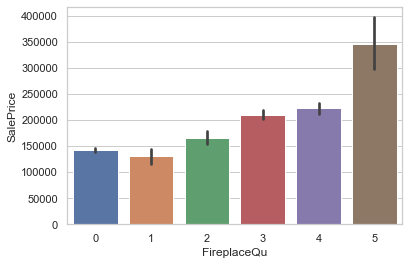

In [39]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train)

In [40]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
c = list(columns_with_miss.index)
c.append('SalePrice')
train[c].corr()

#Missing values in numeric columns

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
LotFrontage,1.000000,0.202225,0.061101,0.341294
MasVnrArea,0.202225,1.000000,0.254547,0.466386
GarageYrBlt,0.061101,0.254547,1.000000,0.474346
SalePrice,0.341294,0.466386,0.474346,1.000000


In [41]:
#Note that LotFrontage, MasVnrArea, and GarageYrBlt have a positive correlation with SalePrice, but this correlation isn't very strong.
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', \
 'MasVnrArea']
train.drop(columns=cols_to_be_removed, inplace=True)

In [42]:
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', \
 'MasVnrArea']
test.drop(columns=cols_to_be_removed, inplace=True)

In [43]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 10


GarageCond      64
GarageQual      64
GarageFinish    64
GarageType      64
BsmtFinType2    31
BsmtExposure    31
BsmtFinType1    30
BsmtCond        30
BsmtQual        30
MasVnrType       7
dtype: int64

In [44]:
columns_with_miss = test.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 11


GarageCond      17
GarageQual      17
GarageFinish    17
GarageType      17
BsmtFinType2     7
BsmtFinType1     7
BsmtExposure     7
BsmtCond         7
BsmtQual         7
Electrical       1
MasVnrType       1
dtype: int64

In [45]:
#Categorical variables
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', \
'BsmtExposure', 'BsmtFinType1']:
    train[c].fillna('NA', inplace=True)
    
# Fills None in place of NaN
train['MasVnrType'].fillna('None', inplace=True)

In [46]:
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', \
'BsmtExposure', 'BsmtFinType1']:
    test[c].fillna('NA', inplace=True)
    
# Fills None in place of NaN
test['MasVnrType'].fillna('None', inplace=True)

In [47]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)


Columns with missing values: 4


GarageCond    64
GarageQual    64
BsmtCond      30
BsmtQual      30
dtype: int64

In [48]:
columns_with_miss = test.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 5


GarageCond    17
GarageQual    17
BsmtCond       7
BsmtQual       7
Electrical     1
dtype: int64

In [49]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    train[col].fillna(0, inplace=True)
    train[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, \
    'Ex': 5}, inplace=True)

In [50]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    test[col].fillna(0, inplace=True)
    test[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, \
    'Ex': 5}, inplace=True)

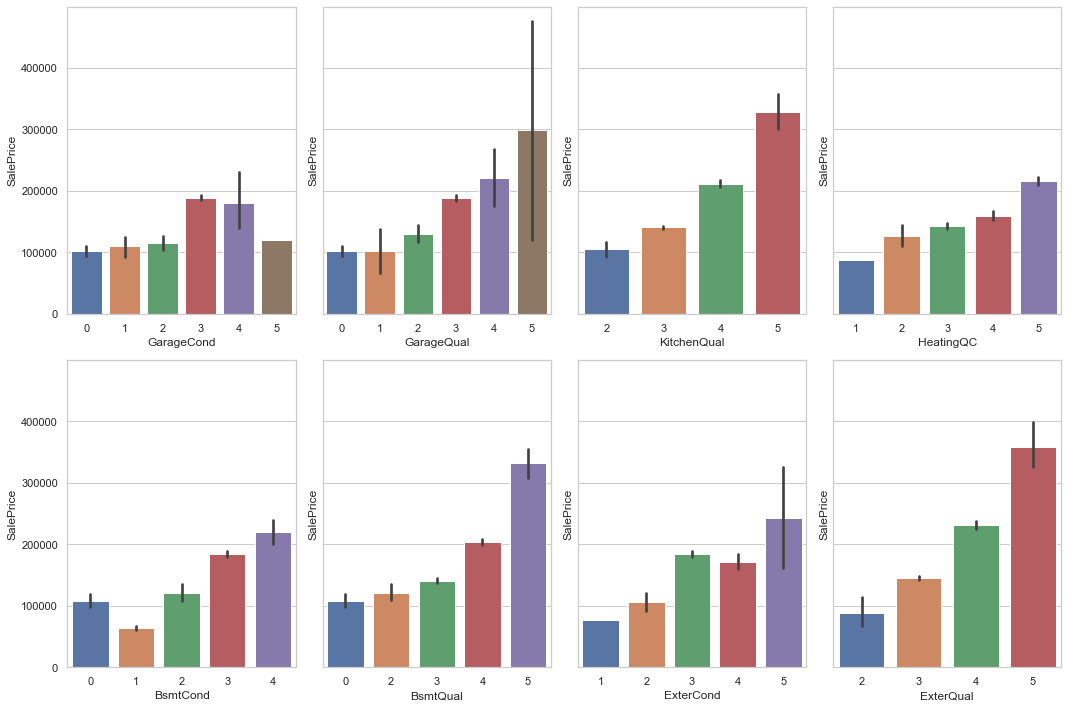

In [51]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", \
        data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()
#the better the category of a variable, the higher the price, which means these variables will be important for a prediction model

In [52]:
cols = train.columns
num_cols = train._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(train[c].value_counts())

sorted_value_counts = {k: v for k, v in \
sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 30


{'Utilities': 1,
 'CentralAir': 2,
 'Street': 2,
 'LandSlope': 3,
 'PavedDrive': 3,
 'GarageFinish': 4,
 'LotShape': 4,
 'MasVnrType': 4,
 'LandContour': 4,
 'Electrical': 5,
 'LotConfig': 5,
 'BldgType': 5,
 'BsmtExposure': 5,
 'MSZoning': 5,
 'Heating': 6,
 'RoofStyle': 6,
 'Foundation': 6,
 'SaleCondition': 6,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'GarageType': 7,
 'Functional': 7,
 'RoofMatl': 8,
 'Condition2': 8,
 'HouseStyle': 8,
 'SaleType': 9,
 'Condition1': 9,
 'Exterior1st': 14,
 'Exterior2nd': 15,
 'Neighborhood': 25}

In [53]:
cols = test.columns
num_cols = test._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(test[c].value_counts())

sorted_value_counts = {k: v for k, v in \
sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 30


{'Utilities': 2,
 'CentralAir': 2,
 'Condition2': 2,
 'Street': 2,
 'RoofMatl': 3,
 'LandSlope': 3,
 'PavedDrive': 3,
 'Heating': 4,
 'Electrical': 4,
 'GarageFinish': 4,
 'LotShape': 4,
 'SaleCondition': 4,
 'MasVnrType': 4,
 'LandContour': 4,
 'MSZoning': 4,
 'LotConfig': 5,
 'RoofStyle': 5,
 'BldgType': 5,
 'BsmtExposure': 5,
 'SaleType': 6,
 'Foundation': 6,
 'Functional': 6,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'GarageType': 7,
 'Condition1': 8,
 'HouseStyle': 8,
 'Exterior1st': 12,
 'Exterior2nd': 14,
 'Neighborhood': 24}

In [54]:
nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(train[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

print(f'Nominal columns with less than 6 values: \
{len(nom_cols_less_than_6)}')

Nominal columns with less than 6 values: 18


In [55]:
nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(test[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

print(f'Nominal columns with less than 6 values: \
{len(nom_cols_less_than_6)}')

Nominal columns with less than 6 values: 22


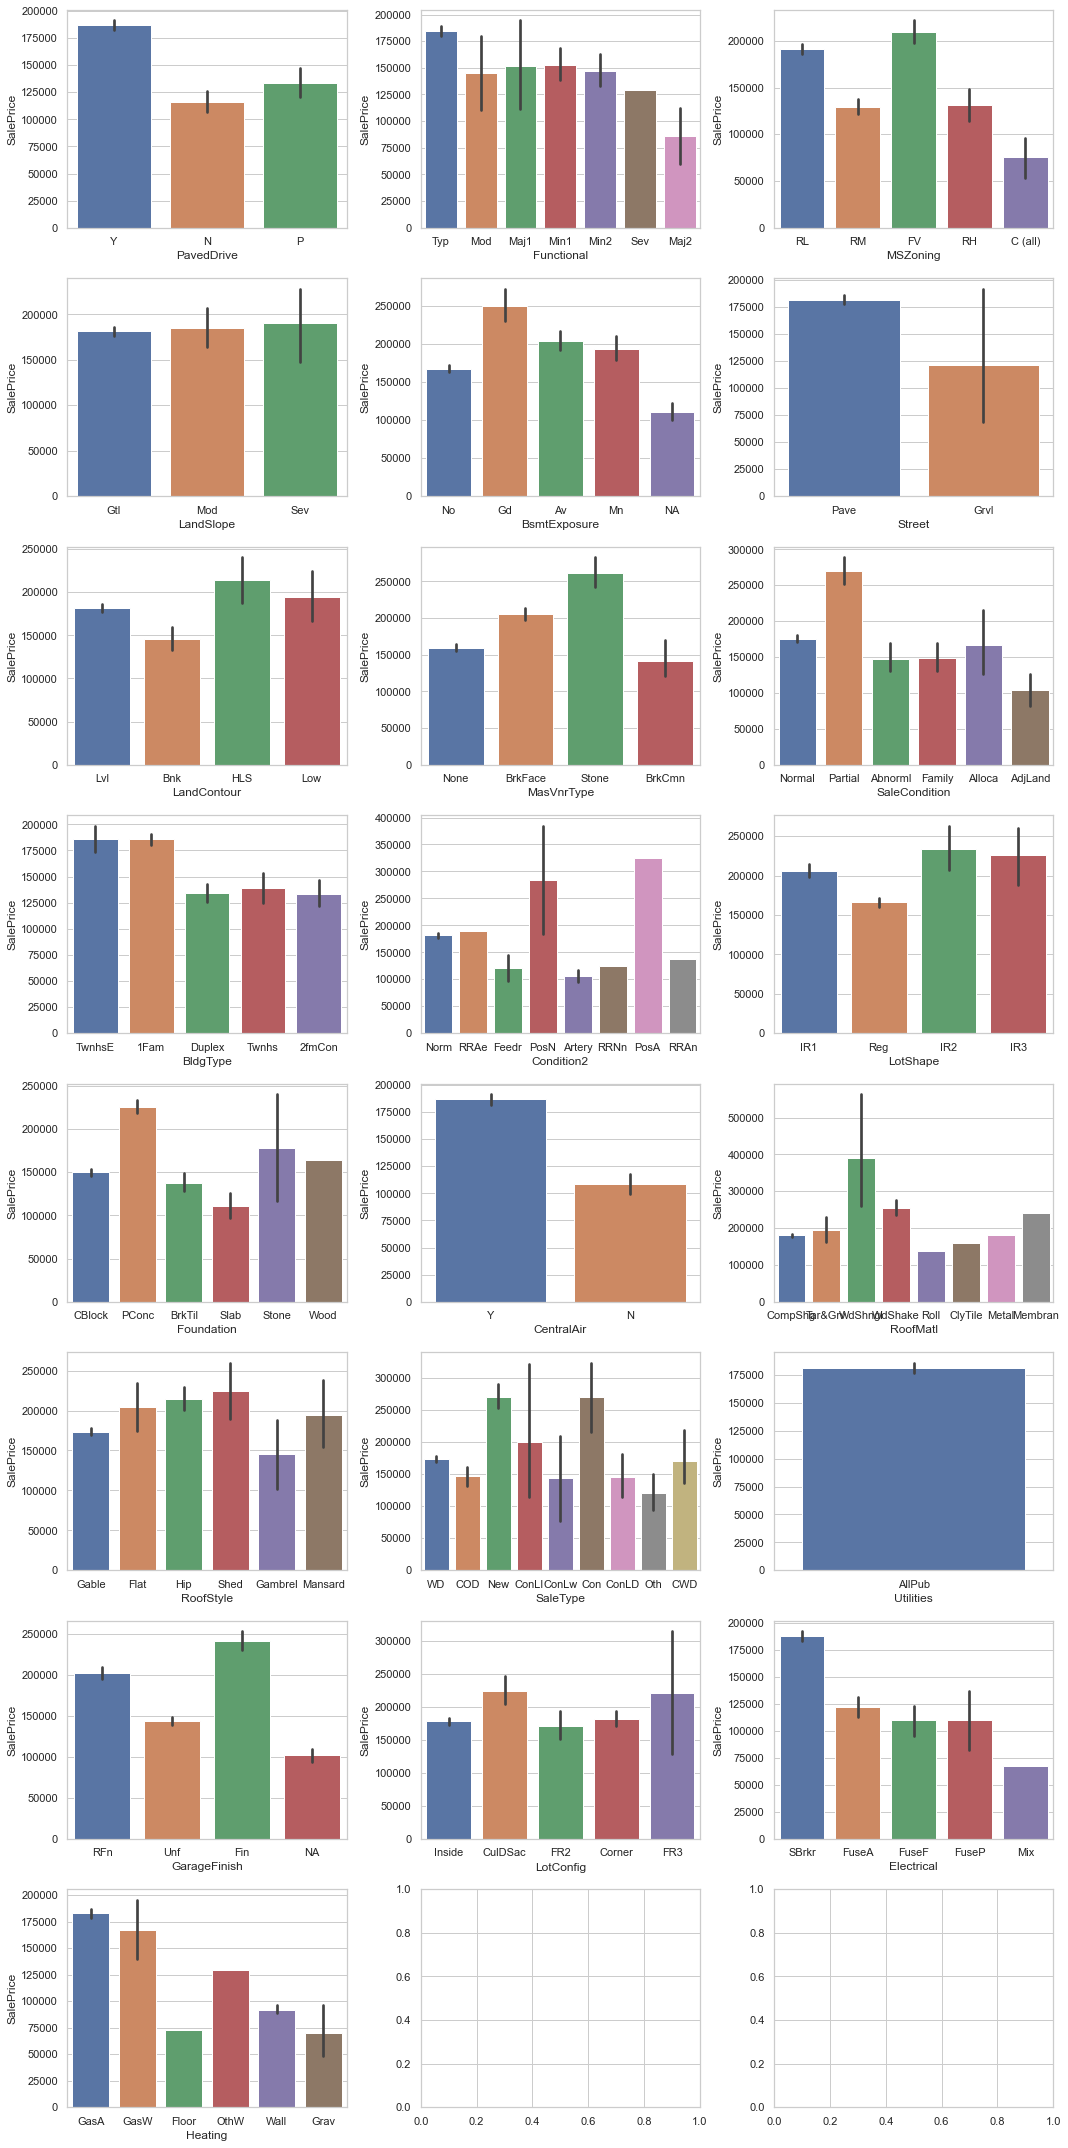

In [56]:
ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not nom_cols_less_than_6:
            continue
        sns.barplot(x=nom_cols_less_than_6.pop(), \
        y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [57]:
# Inputs more frequent value in place of NaN

train['Electrical'].fillna('SBrkr', inplace=True)

In [58]:
test['Electrical'].fillna('SBrkr', inplace=True)

In [59]:
train.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         1161
3SsnPorch        1146
LowQualFinSF     1145
MiscVal          1126
BsmtHalfBath     1105
ScreenPorch      1073
BsmtFinSF2       1032
EnclosedPorch     999
HalfBath          724
BsmtFullBath      686
2ndFlrSF          663
WoodDeckSF        603
Fireplaces        551
FireplaceQu       551
OpenPorchSF       531
BsmtFinSF1        375
BsmtUnfSF          97
GarageQual         64
GarageCars         64
GarageArea         64
GarageCond         64
TotalBsmtSF        30
BsmtQual           30
BsmtCond           30
FullBath            7
dtype: int64

In [60]:
test.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         292
3SsnPorch        290
LowQualFinSF     289
MiscVal          282
BsmtHalfBath     273
ScreenPorch      271
BsmtFinSF2       261
EnclosedPorch    253
HalfBath         189
BsmtFullBath     170
2ndFlrSF         166
WoodDeckSF       158
Fireplaces       139
FireplaceQu      139
OpenPorchSF      125
BsmtFinSF1        92
BsmtUnfSF         21
GarageQual        17
GarageCars        17
GarageArea        17
GarageCond        17
BsmtCond           7
TotalBsmtSF        7
BsmtQual           7
BedroomAbvGr       2
dtype: int64

In [61]:
#Outliers
# Get only numerical columns
numerical_columns = \
list(train.dtypes[train.dtypes == 'int64'].index)

len(numerical_columns)

43

In [62]:
# Get only numerical columns
numerical_columns = \
list(test.dtypes[test.dtypes == 'int64'].index)

len(numerical_columns)

42

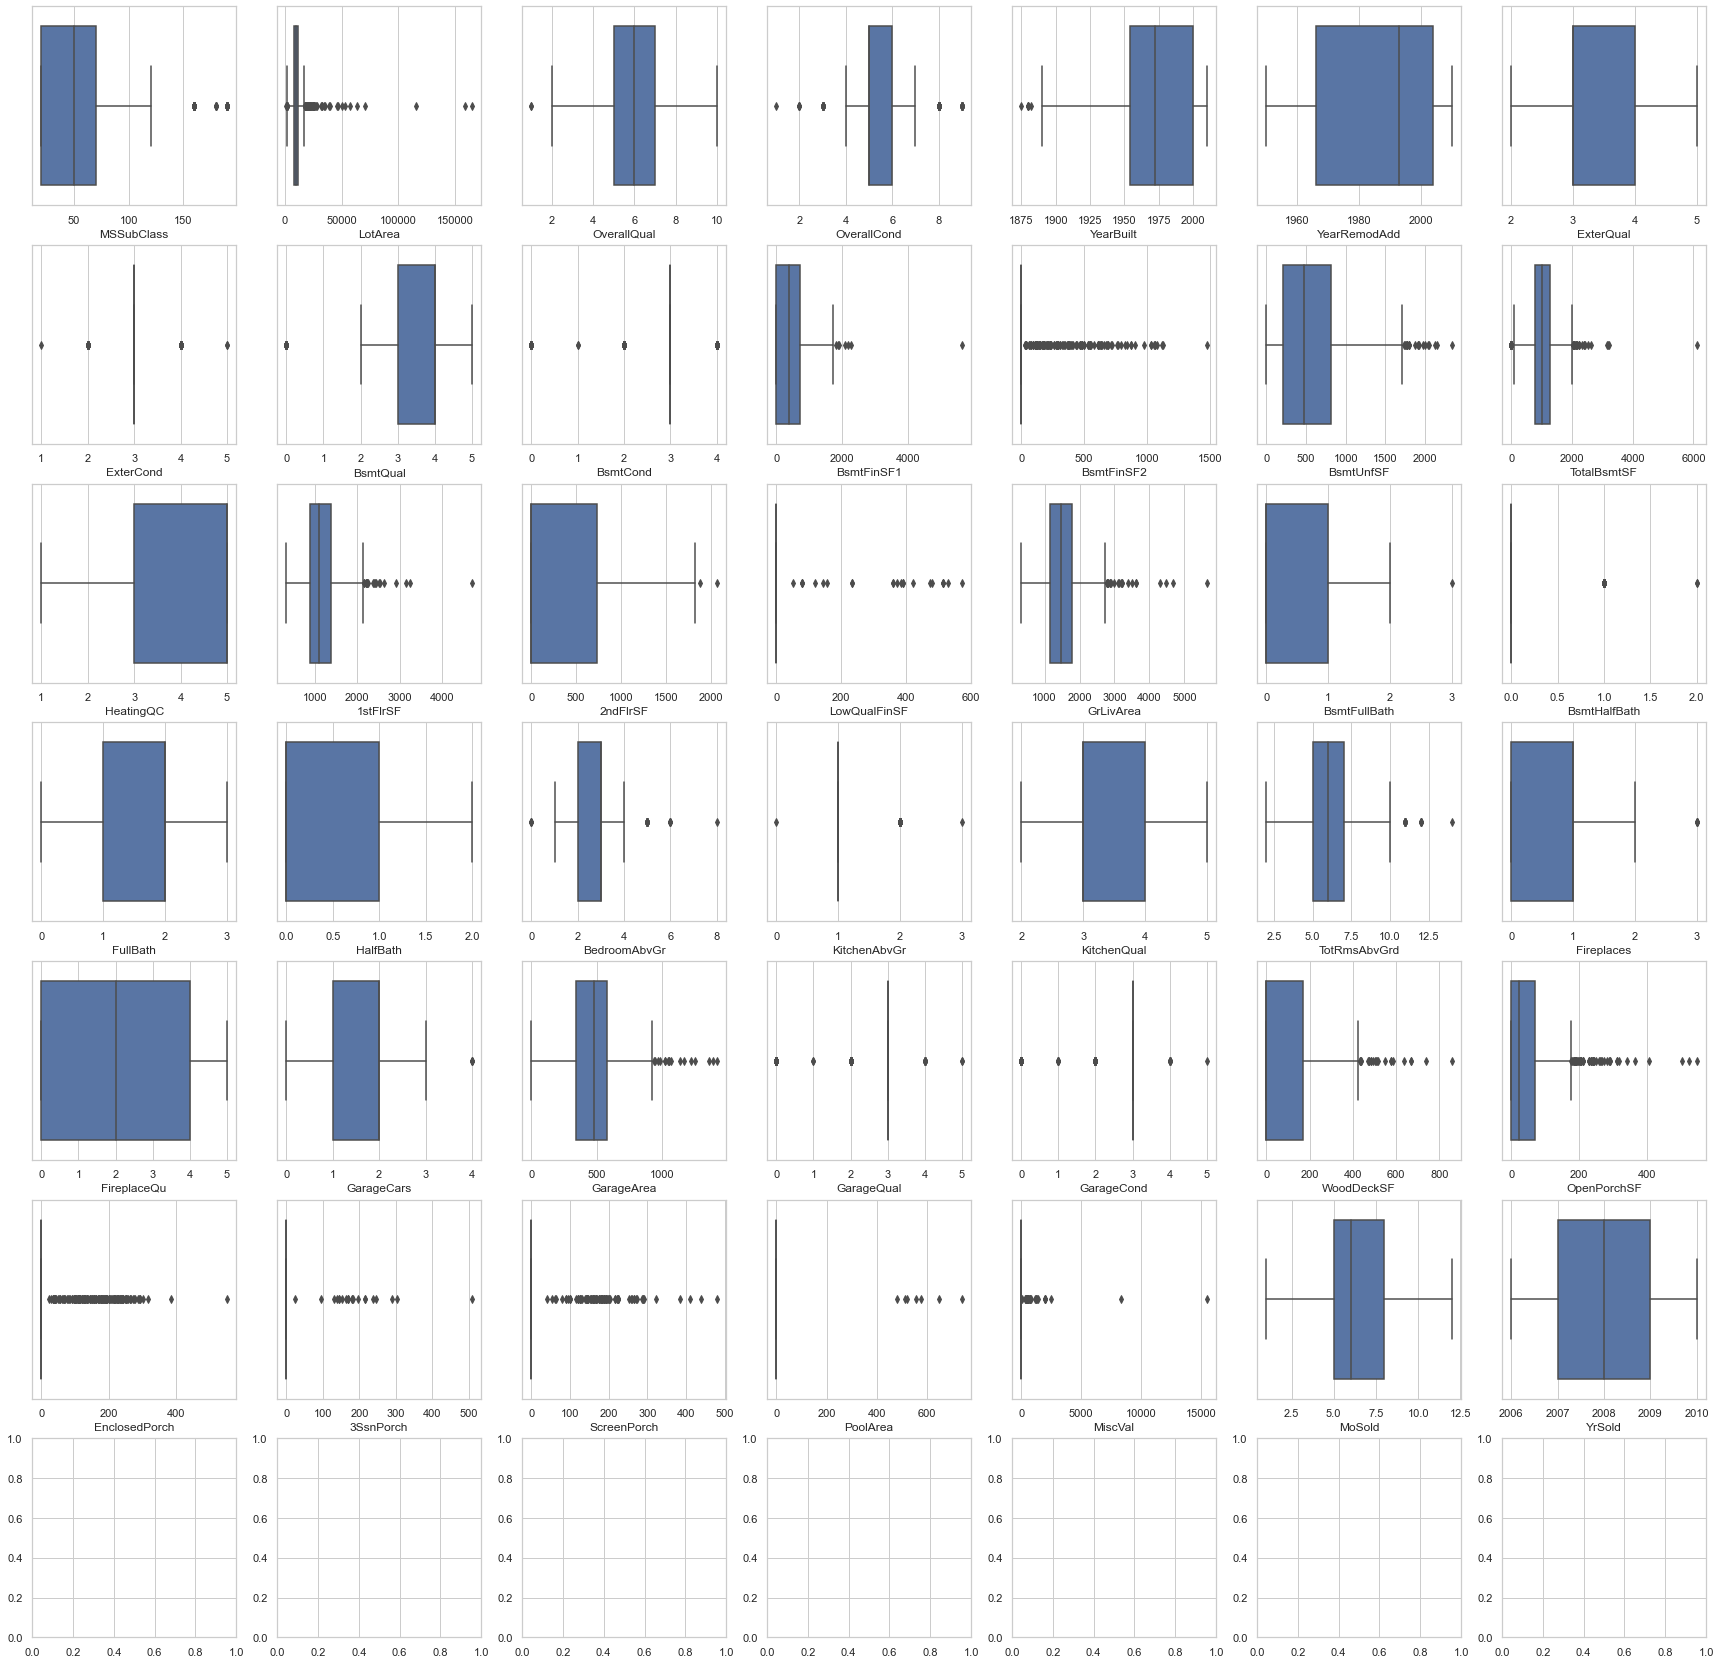

In [63]:
# Create the plot grid
rows = 7
columns = 7

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

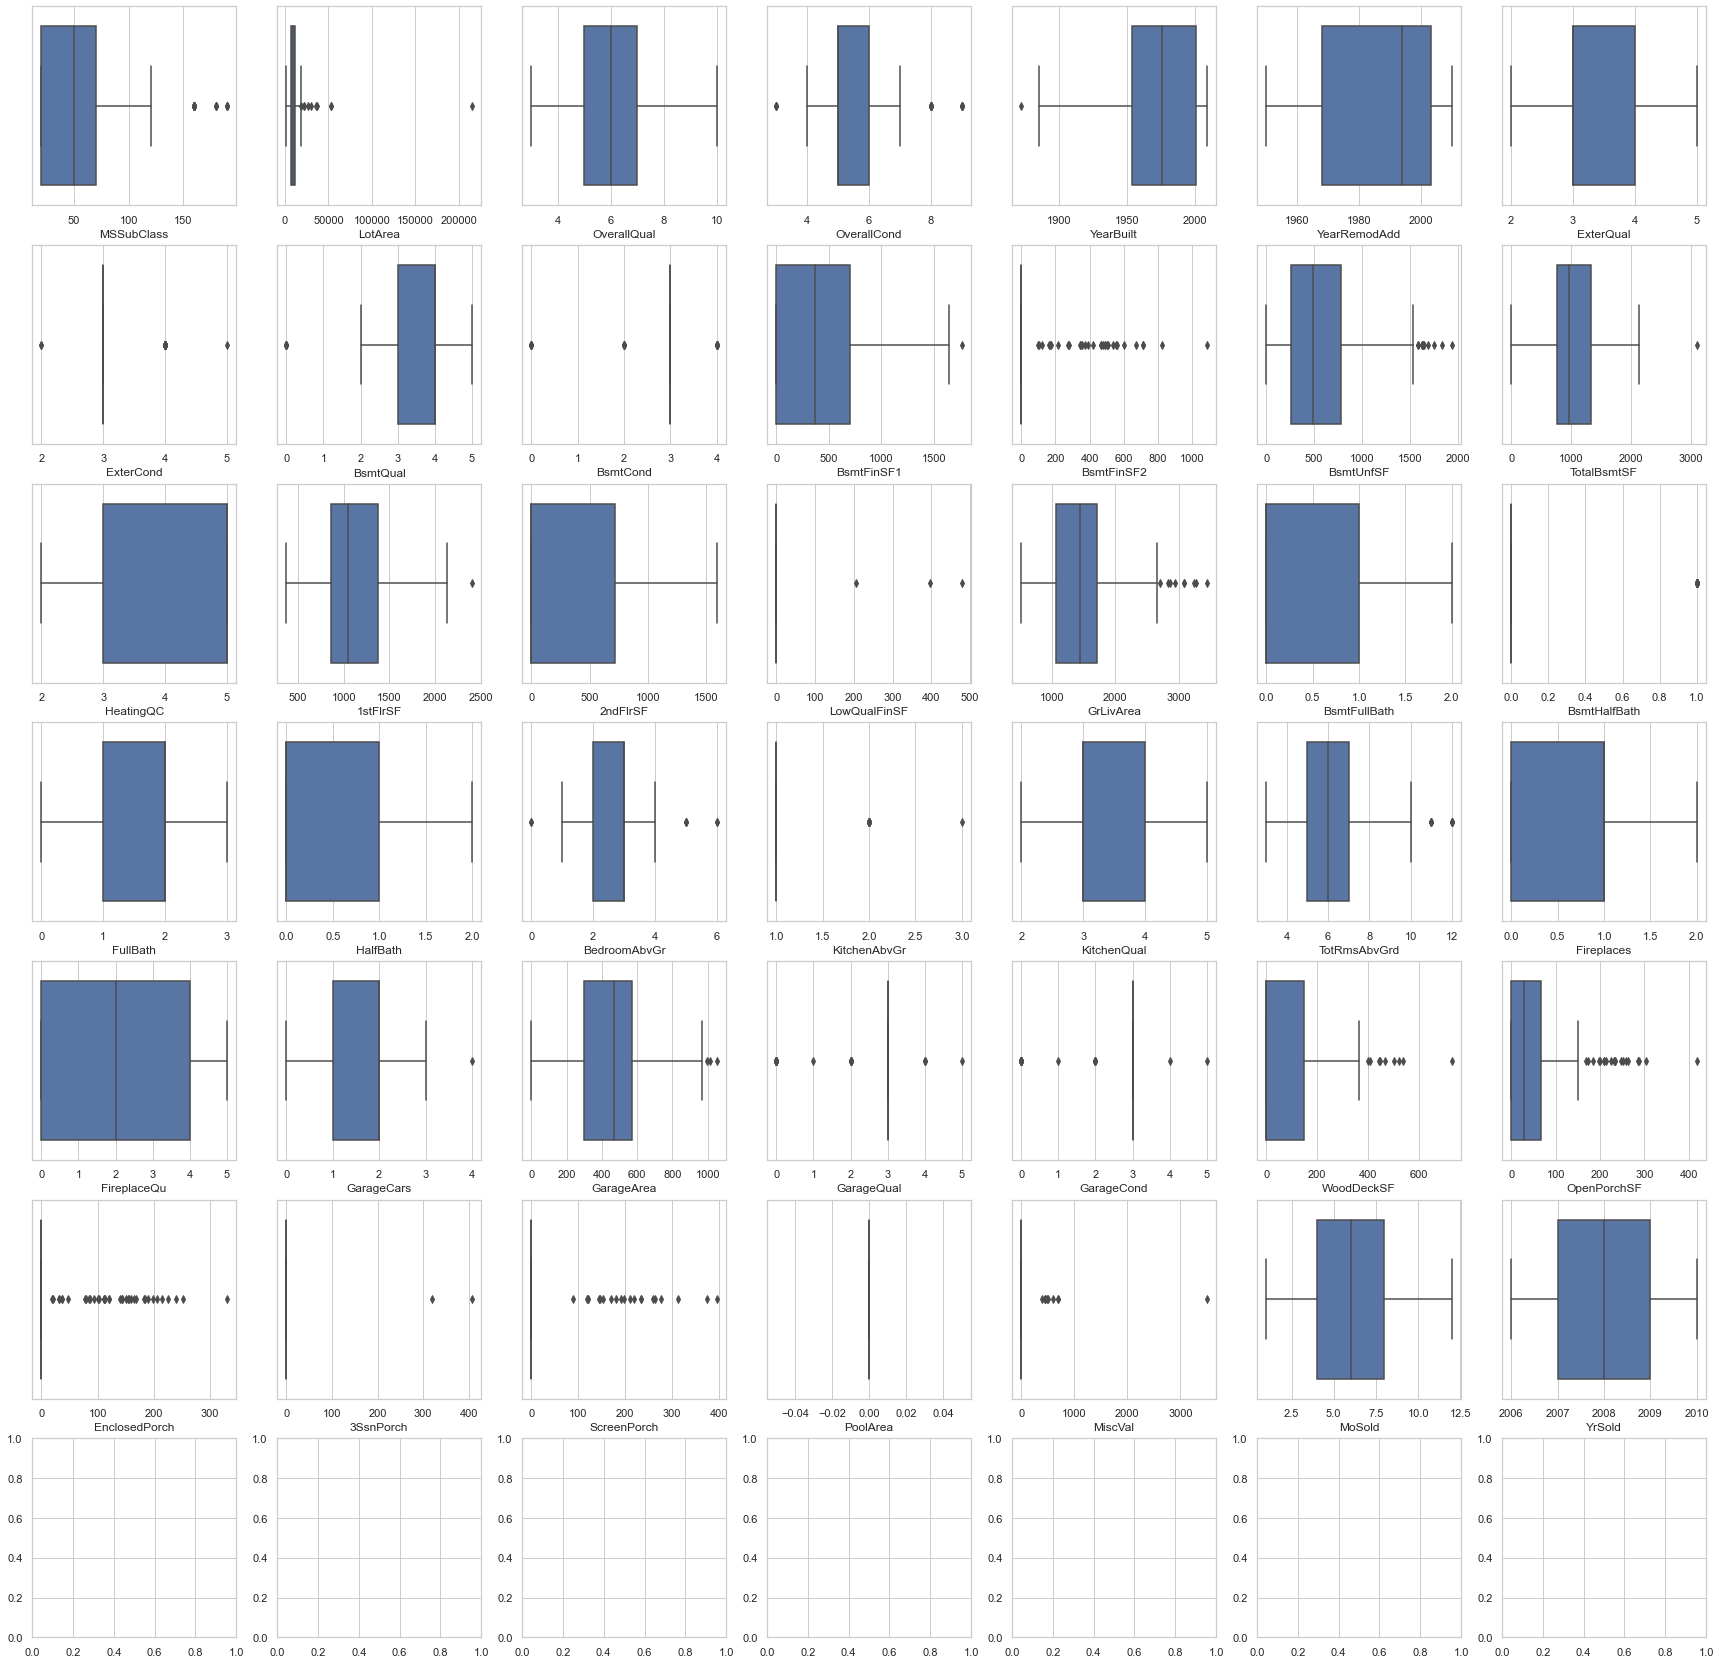

In [64]:
# Create the plot grid
rows = 7
columns = 7

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=test[column], ax=axes[x, y])
    
    if y < columns-1:
        y += 1
    elif y == columns-1:
        x += 1
        y = 0
    else:
        y += 1

In [65]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

In [66]:
columns_with_miss = test.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

In [67]:
train.shape

(1168, 73)

In [68]:
test.shape

(292, 72)

In [69]:
train.to_csv('train-cleaned.csv')

In [72]:
import os
import pandas as pd

# writes the output on 'cleaned_data.csv' by default
def clean_data(df, output_file='cleaned_data.csv'):

    # Removes columns with missing values issues
    cols_to_be_removed = ['Id', 'PoolQC', 'MiscFeature', \
    'Alley', 'Fence', 'LotFrontage',
    'GarageYrBlt', 'MasVnrArea']
    df.drop(columns=cols_to_be_removed, inplace=True)

    # Transforms ordinal columns to numerical
    ordinal_cols = ['FireplaceQu', 'ExterQual', 'ExterCond', \
     'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
    for col in ordinal_cols:
        df[col].fillna(0, inplace=True)
        df[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, \
        'Gd': 4, 'Ex': 5}, inplace=True)

    # Replace the NaN with NA
    for c in ['GarageType', 'GarageFinish', \
     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
        df[c].fillna('NA', inplace=True)

    # Replace the NaN with None
    df['MasVnrType'].fillna('None', inplace=True)

    # Imputes with most frequent value
    df['Electrical'].fillna('SBrkr', inplace=True)

    # Saves a copy
    cleaned_data = os.path.join(output_file)
    df.to_csv(cleaned_data)

    return df

if __name__ == "__main__":
    # Reads the file train.csv
    train_file = os.path.join('train1.csv')

    if os.path.exists(train_file):
        df = pd.read_csv(train_file)
        print(f'Original Data: {df.shape}')
        cleaned_df = clean_data(df)
        print(f'After Cleaning: {cleaned_df.shape}')
    else:
        print(f'File not found {train_file}')

Original Data: (1168, 81)
After Cleaning: (1168, 73)


In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pickle


def create_train_test_data(dataset):
    # load and split the data
    data_train = dataset.sample(frac=0.8, \
    random_state=30).reset_index(drop=True)

    data_test = \
    dataset.drop(data_train.index).reset_index(drop=True)

    # save the data
    data_train.to_csv('train.csv', index=False)
    data_test.to_csv('test.csv', index=False)

    print(f"Train data for modeling: {data_train.shape}")
    print(f"Test data for predictions: {data_test.shape}")

def train_model(x_train, y_train):

    print("Training the model ...")

    model = Pipeline(steps=[
        ("label encoding", \
        OneHotEncoder(handle_unknown='ignore')),
        ("tree model", LinearRegression())
    ])
    model.fit(x_train, y_train)

    return model

def accuracy(model, x_test, y_test):
    print("Testing the model ...")
    predictions = model.predict(x_test)
    tree_mse = mean_squared_error(y_test, predictions)
    tree_rmse = np.sqrt(tree_mse)
    return tree_rmse

def export_model(model):
    # Save the model
    pkl_path = 'model.pkl'
    with open(pkl_path, 'wb') as file:
        pickle.dump(model, file)
        print(f"Model saved at {pkl_path}")

def main():
    # Load the whole data
    data = pd.read_csv('cleaned_data.csv', \
    keep_default_na=False, index_col=0)

    # Split train/test
    # Creates train.csv and test.csv
    create_train_test_data(data)

    # Loads the data for the model training
    train = pd.read_csv('train.csv', keep_default_na=False)
    x_train = train.drop(columns=['SalePrice'])
    y_train = train['SalePrice']

    # Loads the data for the model testing
    test = pd.read_csv('test.csv', keep_default_na=False)
    x_test = test.drop(columns=['SalePrice'])
    y_test = test['SalePrice']

    # Train and Test
    model = train_model(x_train, y_train)
    rmse_test = accuracy(model, x_test, y_test)

    print(f"Average Price Test: {y_test.mean()}")
    print(f"RMSE: {rmse_test}")

    # Save the model
    export_model(model)

if __name__ == '__main__':
    main()

Train data for modeling: (934, 73)
Test data for predictions: (234, 73)
Training the model ...
Testing the model ...
Average Price Test: 170325.18803418803
RMSE: 9853.117164774445
Model saved at model.pkl
